In [62]:
# Importing the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from sklearn import metrics
import itertools
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from matplotlib.image import imread
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Input,Conv2D, MaxPool2D, Dropout, Flatten, Dense 
# Import layers that will be used in modeling

import warnings
warnings.filterwarnings("ignore")

In [78]:
tr_path = 'D:\\Downloads\\DLNLP-SetA\\DLNLP-SetA\\question2a'
classes = []
class_paths = []
files = os.listdir(tr_path)
for file in files:
    label_dir = os.path.join(tr_path, file)
    label = os.listdir(label_dir)
    for image in label:
        image_path = os.path.join(label_dir, image)
        class_paths.append(image_path)
        classes.append(file)

In [79]:
image_classes = pd.Series(classes, name='Class')
image_paths = pd.Series(class_paths, name='Class Path')
tr_df = pd.concat([image_paths, image_classes], axis=1)

In [80]:
tr_df

,Class Path,Class
0,D:\Downloads\DLNLP-SetA\DLNLP-SetA\question2a\...,Cloudy
1,D:\Downloads\DLNLP-SetA\DLNLP-SetA\question2a\...,Cloudy
2,D:\Downloads\DLNLP-SetA\DLNLP-SetA\question2a\...,Cloudy
3,D:\Downloads\DLNLP-SetA\DLNLP-SetA\question2a\...,Cloudy
4,D:\Downloads\DLNLP-SetA\DLNLP-SetA\question2a\...,Cloudy
...,...,...
1120,D:\Downloads\DLNLP-SetA\DLNLP-SetA\question2a\...,Sunrise
1121,D:\Downloads\DLNLP-SetA\DLNLP-SetA\question2a\...,Sunrise
1122,D:\Downloads\DLNLP-SetA\DLNLP-SetA\question2a\...,Sunrise
1123,D:\Downloads\DLNLP-SetA\DLNLP-SetA\question2a\...,Sunrise


In [81]:
tr_dat, ts_data = train_test_split(tr_df, test_size=.20, shuffle=True, random_state=20)

In [82]:
ts_data

,Class Path,Class
989,D:\Downloads\DLNLP-SetA\DLNLP-SetA\question2a\...,Sunrise
734,D:\Downloads\DLNLP-SetA\DLNLP-SetA\question2a\...,Shine
143,D:\Downloads\DLNLP-SetA\DLNLP-SetA\question2a\...,Cloudy
137,D:\Downloads\DLNLP-SetA\DLNLP-SetA\question2a\...,Cloudy
1032,D:\Downloads\DLNLP-SetA\DLNLP-SetA\question2a\...,Sunrise
...,...,...
121,D:\Downloads\DLNLP-SetA\DLNLP-SetA\question2a\...,Cloudy
836,D:\Downloads\DLNLP-SetA\DLNLP-SetA\question2a\...,Sunrise
482,D:\Downloads\DLNLP-SetA\DLNLP-SetA\question2a\...,Rain
59,D:\Downloads\DLNLP-SetA\DLNLP-SetA\question2a\...,Cloudy


In [83]:
tr_data, val_data = train_test_split(tr_dat, test_size=.10, shuffle=True, random_state=20)

In [96]:
batch_size = 16
img_size = (120, 120)
channels = 3
img_shape = (120, 120, 3)

gen = ImageDataGenerator(shear_range = 0.2,
                                horizontal_flip= True,
                                   zoom_range = 0.1
                                   )

tr_gen = gen.flow_from_dataframe(tr_data, x_col= 'Class Path', y_col= 'Class'
                                    ,target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)

gen_ts =ImageDataGenerator(rescale=1. / 255, shear_range = 0.2,
                                horizontal_flip= True,
                                   zoom_range = 0.1
                                   )

ts_gen = gen_ts.flow_from_dataframe(ts_data, x_col= 'Class Path', y_col= 'Class',
                                   target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)

val_gen = gen.flow_from_dataframe(val_data, x_col= 'Class Path', y_col= 'Class',
                                   target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)

Found 810 validated image filenames belonging to 4 classes.
Found 225 validated image filenames belonging to 4 classes.
Found 90 validated image filenames belonging to 4 classes.


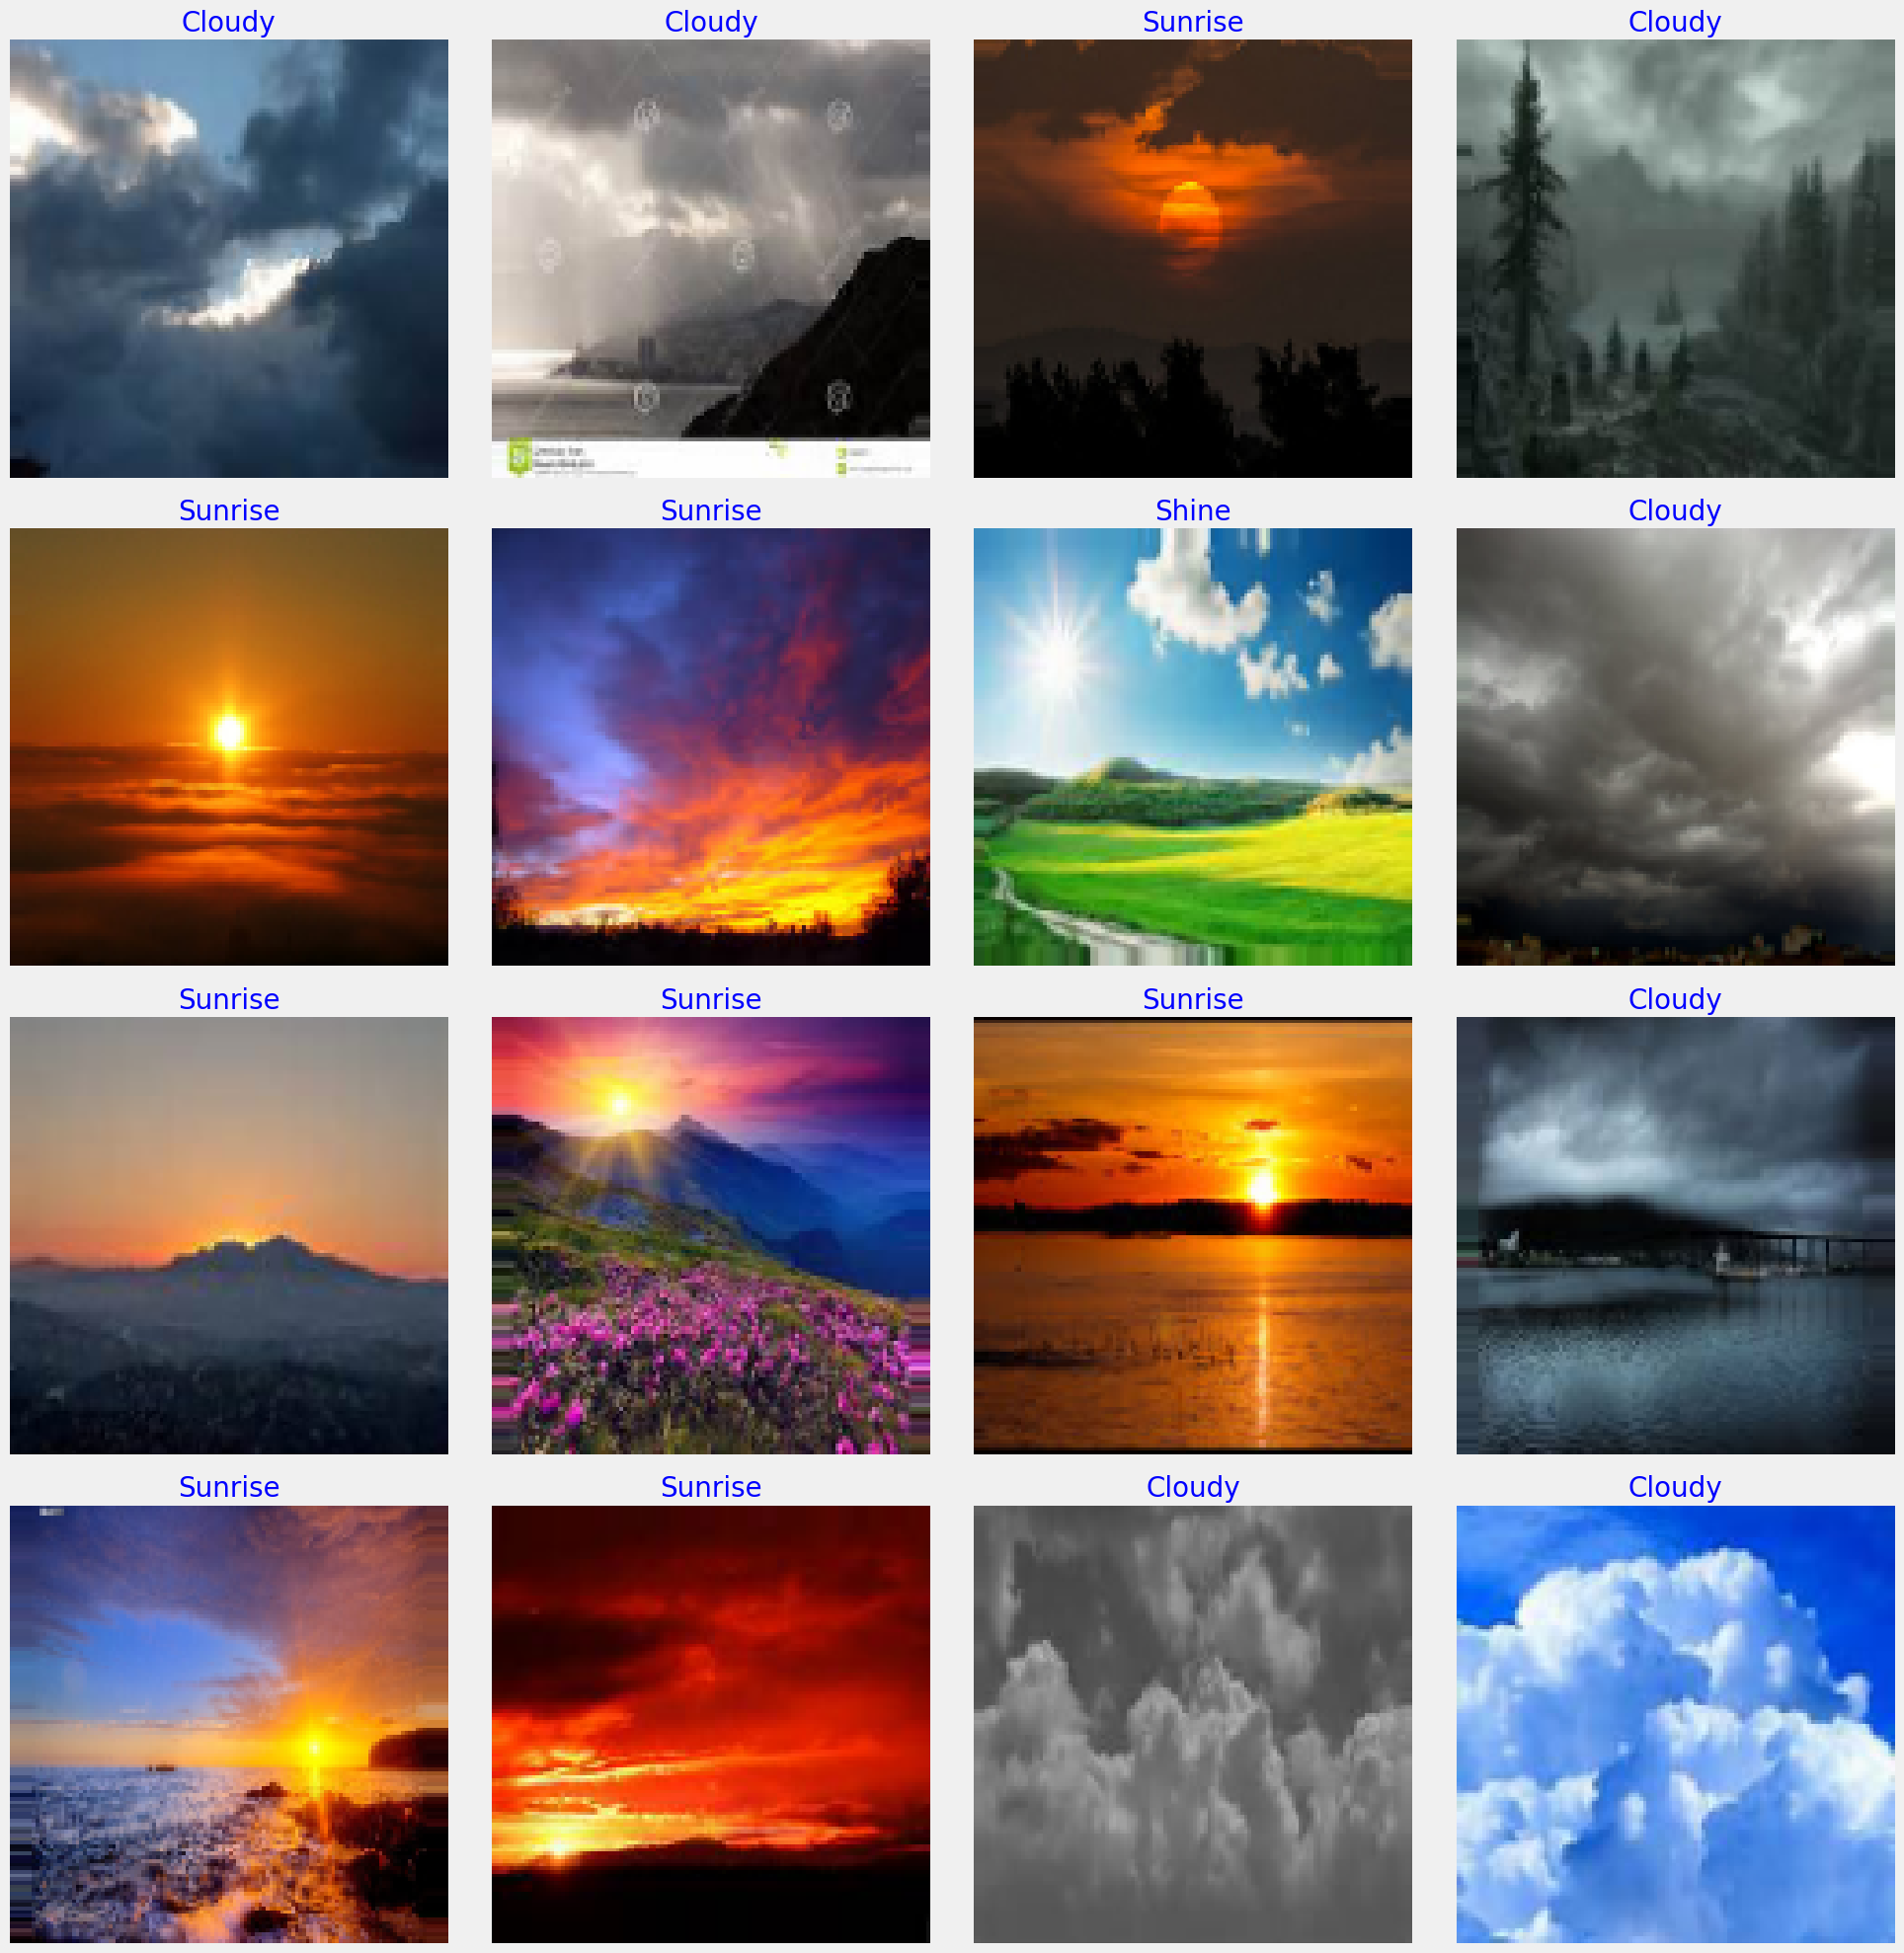

In [97]:
g_dict = tr_gen.class_indices      
classes = list(g_dict.keys())       
images, labels = next(tr_gen)      

plt.figure(figsize= (20, 20))

for i in range(16):
    plt.subplot(4, 4, i + 1)
    image = images[i] / 255       # scales data to range (0 - 255)
    plt.imshow(image)
    index = np.argmax(labels[i])  # get image index
    class_name = classes[index]   # get class of image
    plt.title(class_name, color= 'blue', fontsize= 20)
    plt.axis('off')
plt.tight_layout()
plt.show()

In [87]:
model = Sequential()

# 4.1 Add Input layer
model.add(Input(shape = img_shape ))

# 4.2 Add Conv2D layer
model.add(Conv2D(
	             filters=64,                # For every filter there is set of weights
	                                        # For each filter, one bias. So total bias = 32
	             kernel_size=(3, 3),        # For each filter there are 3*3=9 kernel_weights
	             strides = (2,2),           # So output shape will be 148 X 148 (W-F+1). Conv layer kitna displace hogi(2 se displace both r & c)
	                                        # Default strides is 1 only
	             #input_shape=input_shape,   # (150,150,3)
	             padding='same',           # 'valid' => No padding. This is default.
	             activation='relu'
	             )
         )

 #"valid" means no padding. "same" results in padding with zeros
 # evenly to the left/right or up/down of the input.

model.add(MaxPool2D())

# We can also write this instead of above: 
# model.add(MaxPooling2D(
# 	                   pool_size=(pool_size, pool_size))         # 2 X 2
#                       )


model.add(Conv2D(
             filters=128,                
             kernel_size=(3, 3),
             padding = 'same',
             strides = (2,2),
            activation='elu'
             )
         )

model.add(Conv2D(
             filters=64,                
             kernel_size=(3, 3),
            activation='selu'
             )
         )

model.add(MaxPool2D())
model.add(Flatten())

model.add(Dense(1024,activation = 'PReLU'))
model.add(Dropout(rate=0.4))
model.add(Dense(512, activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(256, activation='relu'))



In [88]:

# When more than 2 categories

model.add(
             Dense(
                    4,
                    activation='softmax'
                  )
         )

model.compile(
              loss='categorical_crossentropy',            # using the cross-entropy loss function
              optimizer='adam',                           # using the Adam optimiser
                                                          # Ref: https://keras.io/optimizers/
                                                          # keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
              metrics=['accuracy']) 

In [46]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 60, 60, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 30, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 15, 15, 128)       73856     
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2304)             

In [47]:
plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [89]:
history = model.fit_generator(
                              # First argument is always data generator
                              generator = tr_gen,
                              epochs=5,
                              # Get validation data from validation generator
                              validation_data= val_gen,
                              verbose = 1
                              )

Epoch 1/5
51/51 [==============================] - 16s 273ms/step - loss: 0.9117 - accuracy: 0.6210 - val_loss: 0.6531 - val_accuracy: 0.7667
Epoch 2/5
51/51 [==============================] - 13s 265ms/step - loss: 0.6341 - accuracy: 0.7346 - val_loss: 0.7103 - val_accuracy: 0.7222
Epoch 3/5
51/51 [==============================] - 14s 266ms/step - loss: 0.5479 - accuracy: 0.7889 - val_loss: 0.4985 - val_accuracy: 0.7889
Epoch 4/5
51/51 [==============================] - 15s 284ms/step - loss: 0.5043 - accuracy: 0.8086 - val_loss: 0.3993 - val_accuracy: 0.8111
Epoch 5/5
51/51 [==============================] - 14s 268ms/step - loss: 0.4607 - accuracy: 0.8210 - val_loss: 0.5057 - val_accuracy: 0.7778


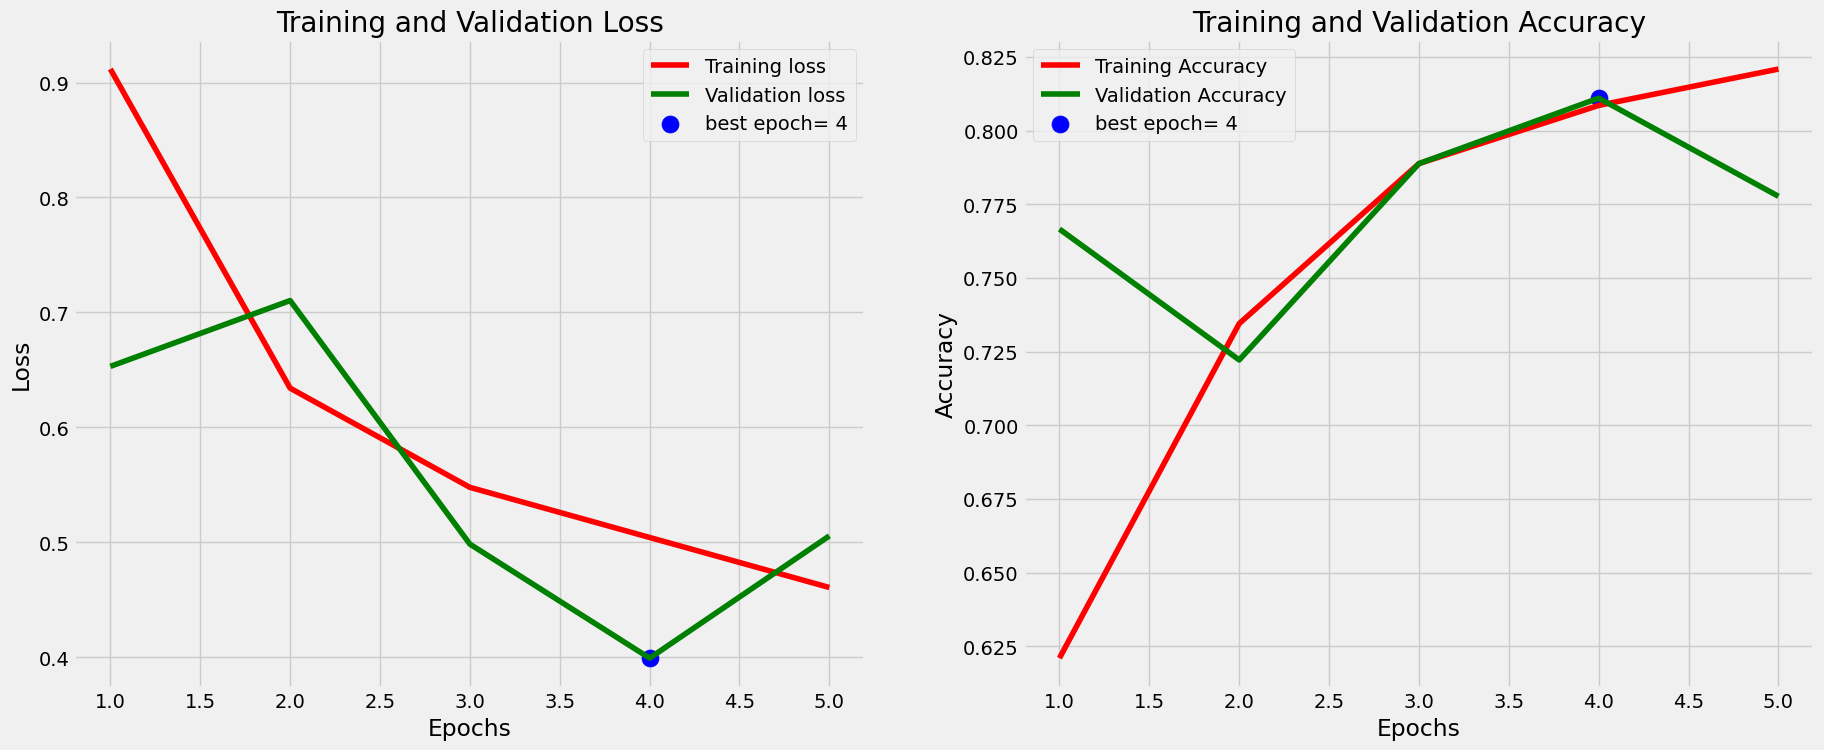

In [90]:
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]

Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

In [91]:
preds = model.predict_generator(ts_gen)    
y_pred = np.argmax(preds, axis=1)

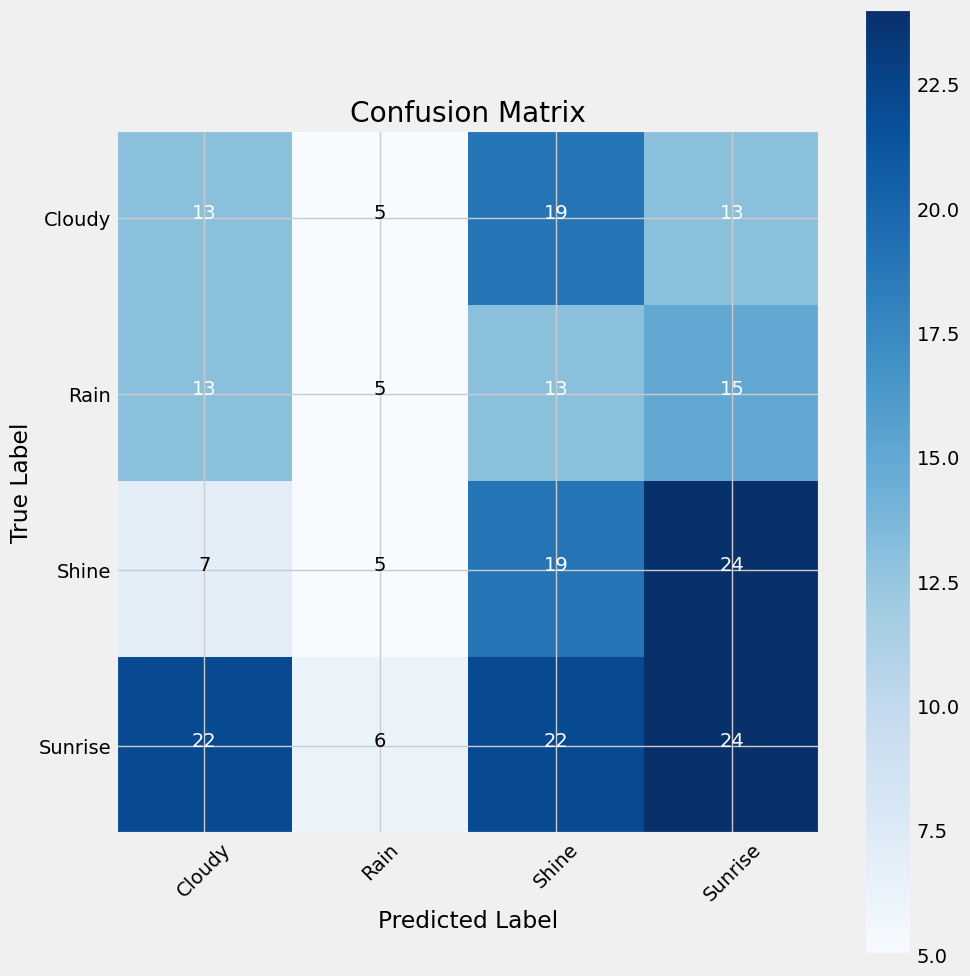

In [92]:
g_dict = ts_gen.class_indices
classes = list(g_dict.keys())

cm = confusion_matrix(ts_gen.classes, y_pred)
cm

plt.figure(figsize= (10, 10))
plt.imshow(cm, interpolation= 'nearest', cmap= plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation= 45)
plt.yticks(tick_marks, classes)


thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()

In [93]:
# 9.0.2 Get iterator
#       and a batch of (images, image_labels)
im = ts_gen    # Get iterator
images = next(im)      # Get images
images[0].shape

(16, 120, 120, 3)

In [94]:
# 9.1 Make predictions
results = model.predict(images[0])


1/1 [==============================] - 0s 190ms/step


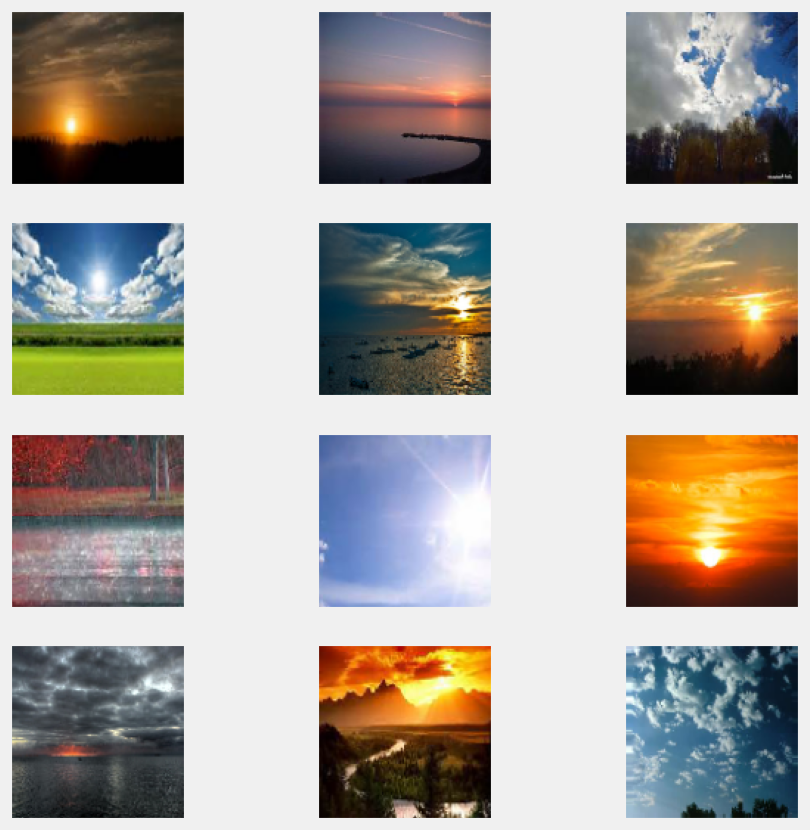

[[2.7592142e-07 4.2623651e-09 7.5306929e-08 9.9999964e-01]
 [1.5525573e-03 4.7585927e-04 1.1401654e-03 9.9683148e-01]
 [5.3370678e-01 7.0112899e-02 3.4942710e-01 4.6753131e-02]
 [1.0949003e-02 6.1055587e-04 9.8513919e-01 3.3012917e-03]
 [7.5459396e-03 1.4943832e-03 9.7346874e-03 9.8122495e-01]
 [5.2521587e-09 3.4839982e-11 1.8678099e-09 1.0000000e+00]
 [2.2541787e-01 4.3609649e-01 7.2523892e-02 2.6596180e-01]
 [5.1816061e-02 4.5126309e-03 9.4305402e-01 6.1725220e-04]
 [1.1775190e-16 6.0232552e-22 1.2752285e-16 1.0000000e+00]
 [7.3162949e-01 2.0286711e-01 5.6971170e-02 8.5321795e-03]
 [1.9910209e-09 6.5720979e-12 1.0377286e-09 1.0000000e+00]
 [1.6642345e-01 3.5252515e-02 7.9259473e-01 5.7292711e-03]
 [9.3721640e-01 4.8710942e-02 1.3420818e-02 6.5183017e-04]
 [8.0422098e-03 2.0397021e-04 9.9165982e-01 9.4081435e-05]
 [1.6119656e-01 2.5319347e-02 8.0915505e-01 4.3291249e-03]
 [4.7272450e-01 4.2717499e-01 9.3460806e-02 6.6396892e-03]]


In [95]:
# 9.2 Plot the images and check with
#     results
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
plt.figure(figsize= (10,10))
for i in range(results.shape[0]):
    try:
        plt.subplot(4,3,i+1, xticks=[], yticks=[])
        _=imshow(images[0][i]) ;
    except ValueError:
        break

plt.show() ;
# 9.3 Predicted labels
print(results)         # Probability values
                       # > 0.5 is Dog